In [1]:
import numpy as np

# Problem 1
$$f(x)=e^{iax}$$
$$Function(y)=\int_{0}^y f(x)dx$$
 
We can validate Function with $Function(y)=\int_0^y f(x) dx =-\frac{i}{a} \Big( e^{iay}-1 \Big)$


In [2]:
def func(a,y):
    dx=1/int(1e6)
    xs=np.arange(start=0,stop=y,step=dx)
    def f(x):
        return np.exp(1j*a*x)
    
    s_low=0
    for x in xs:
        s_low+=f(x)*dx
    return s_low

In [3]:
def true_func(a,y):
    return np.exp(1j*a*y)*(-1j)/a - (1/((1j)*a))

In [4]:
func(1.5,2.)

(0.09408100036949445+1.3266615938400574j)

In [5]:
true_func(1.5,2.)

(0.0940800053732448+1.3266616644002969j)

# Problem 2
## exponential operator
$$\hat{U}(t)=\exp \Big[ i\int_0^{t} \hat{\sigma}_x f(t')dt'\Big ]\qquad (1)$$
$$\frac{dU}{dt}=if(t)\sigma_xU \qquad(2)$$
$$U(t_{n+1})= U(t_n)+\frac{dU}{dt}|_{t=n}\Delta t \qquad(3)$$
where $\Delta t$ is fixed time step $(10^{-4})$ 

 $t_0=0$, $U(t_0)=1$,  $t_n=\Delta t n$

Using definition of exponential operator(Taylor expansion) we can validate our method
 $$\hat{U}(t)=\exp\Big[i\sigma_x F(t) \Big]=i\sigma_x \cos{\Big(\int_0^t f(t')}dt'\Big)+I\sin \Big( \int_0^t f(t')dt' \Big)
$$ 


where $F(t)=\int_0^tf(t')dt'$

In [12]:
def func2(t,f,time_step):
    delta=time_step
    sigma_x=np.array([[0,1],[1,0]],dtype='complex128')
    s=np.arange(start=0,stop=t,step=delta)
    
    def U_derivative(t,f,U):
        return (1j)*f(t)*np.matmul(sigma_x,U)
        
    #initial U(t=0)=I
    U_t=np.identity(2,dtype='complex128')
    suma=U_t
    
    for t in s[1:]:
        suma+=U_derivative(t,f,U=U_t)*delta
        U_t=suma
    return suma
    
    
    
    

In [13]:
def true_func2(t,f,time_step):
    def g(t):
        dt=time_step
        ts=np.arange(start=0,stop=t,step=dt)
        suma=0
        for t in ts:
            suma+=f(t)*dt
        return suma
    sigma_x=np.array([[0,1],[1,0]])
    I=np.identity(2)
    return I*np.cos(g(t))+(1j)*sigma_x*np.sin(g(t))

In [14]:
def f1(t):
    return np.sin(t)

In [21]:
time=np.linspace(0,40,40)

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
heyhey=[]
for t in time:
    hey=func2(t,f1,1/(1e3))-true_func2(t,f1,1/(1e3))
    heyhey.append(hey[1][1])

In [24]:
hihi=[]
for t in time:
    hi=func2(t,f1,1/(1e4))-true_func2(t,f1,1/(1e4))
    hihi.append(hi[1][1])

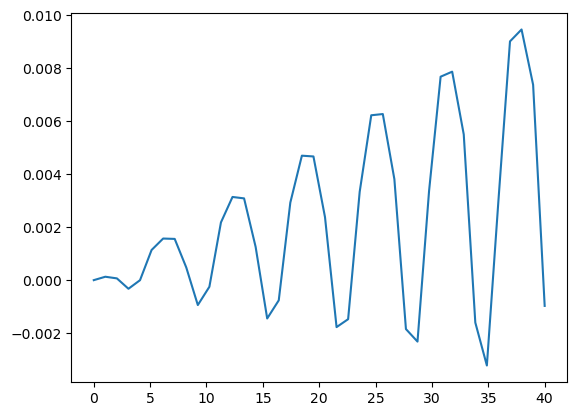

In [25]:
fig,ax = plt.subplots()
ax.plot(time,heyhey)


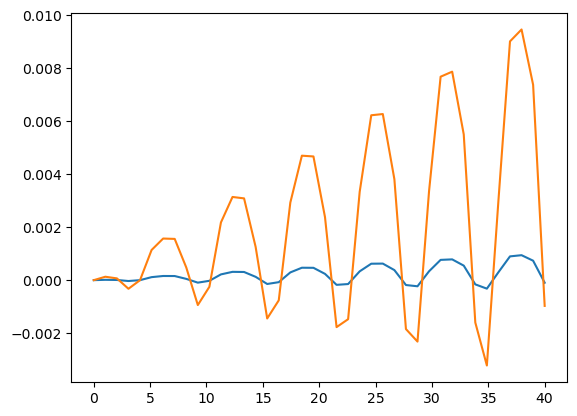

In [26]:
fig,ax = plt.subplots()
ax.plot(time,hihi)
ax.plot(time,heyhey)

#time step
$10^{-4}$ 일때 소수점 두개까지는 정확하다 

# Problem 3
## exponential operator
$$\hat{U}(t)=\exp \Big[ i\int_0^{t} \hat{\sigma}_x f(t') +  \hat{\sigma}_y g(t')dt' \Big ] $$


